In [71]:
import json
import csv
import pandas as pd
#https://flothesof.github.io/kaggle-whats-cooking-machine-learning.html
food = pd.read_json('train.json', orient = 'columns')
food.head()


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

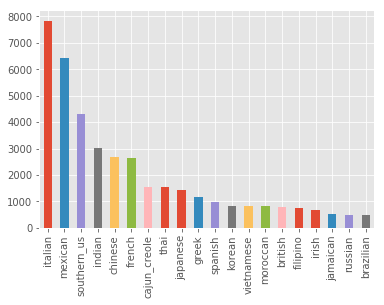

In [27]:
food['cuisine'].value_counts().plot('bar')

In [29]:
from collections import Counter

In [49]:
counters = {}
for cuisine in food['cuisine'].unique():
    counters[cuisine]=Counter()
    indices = (food['cuisine'] == cuisine)
    for ingredients in food[indices]['ingredients']:
        counters[cuisine].update(ingredients)

#print(indices)

In [50]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [57]:
dec = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
                   index=[cuisine for cuisine in counters],
                  columns=['top{}'.format(i) for i in range(1, 11)])
dec

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [61]:
import re
import base64
import pdb

In [69]:
"""
def repl(m):
    ingredient = m.groups()[0]
    image_path = 'img/' + ingredient + '.png'
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    return '{}">'.format(encoded_string.decode('utf-8'))

table_with_images = re.sub("([ \-\w]+)", repl, dec.to_html())*/

"""""""
from IPython.display import HTML
HTML(table_with_images)""""

"""

'\ndef repl(m):\n    ingredient = m.groups()[0]\n    image_path = \'img/\' + ingredient + \'.png\'\n    with open(image_path, "rb") as image_file:\n        encoded_string = base64.b64encode(image_file.read())\n    return \'{}">\'.format(encoded_string.decode(\'utf-8\'))\n\ntable_with_images = re.sub("([ \\-\\w]+)", repl, dec.to_html())*/'

In [74]:
food['all_ingredients'] = food['ingredients'].map(";".join)
food.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


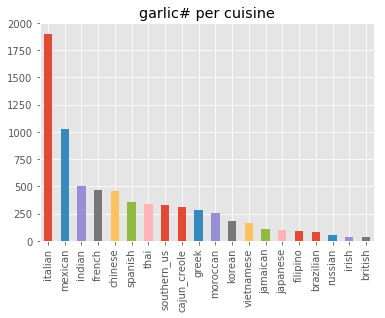

In [123]:
#plot
indices = food['all_ingredients'].str.contains('garlic cloves')
food[indices]['cuisine'].value_counts().plot(kind='bar',title='garlic# per cuisine')


3.523432696975201

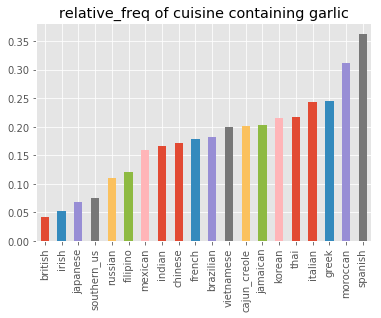

In [133]:
relative_freq = (food[indices]['cuisine'].value_counts()/food['cuisine'].value_counts())
#relative_freq.sort(inplace=True)
#relative_freq.plot(kind='bar')
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar',title='relative_freq of cuisine containing garlic cloves')

In [135]:
import numpy as np
unique = np.unique(dec.values.ravel())
unique
#unique top10 ingredients in each cuisine

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

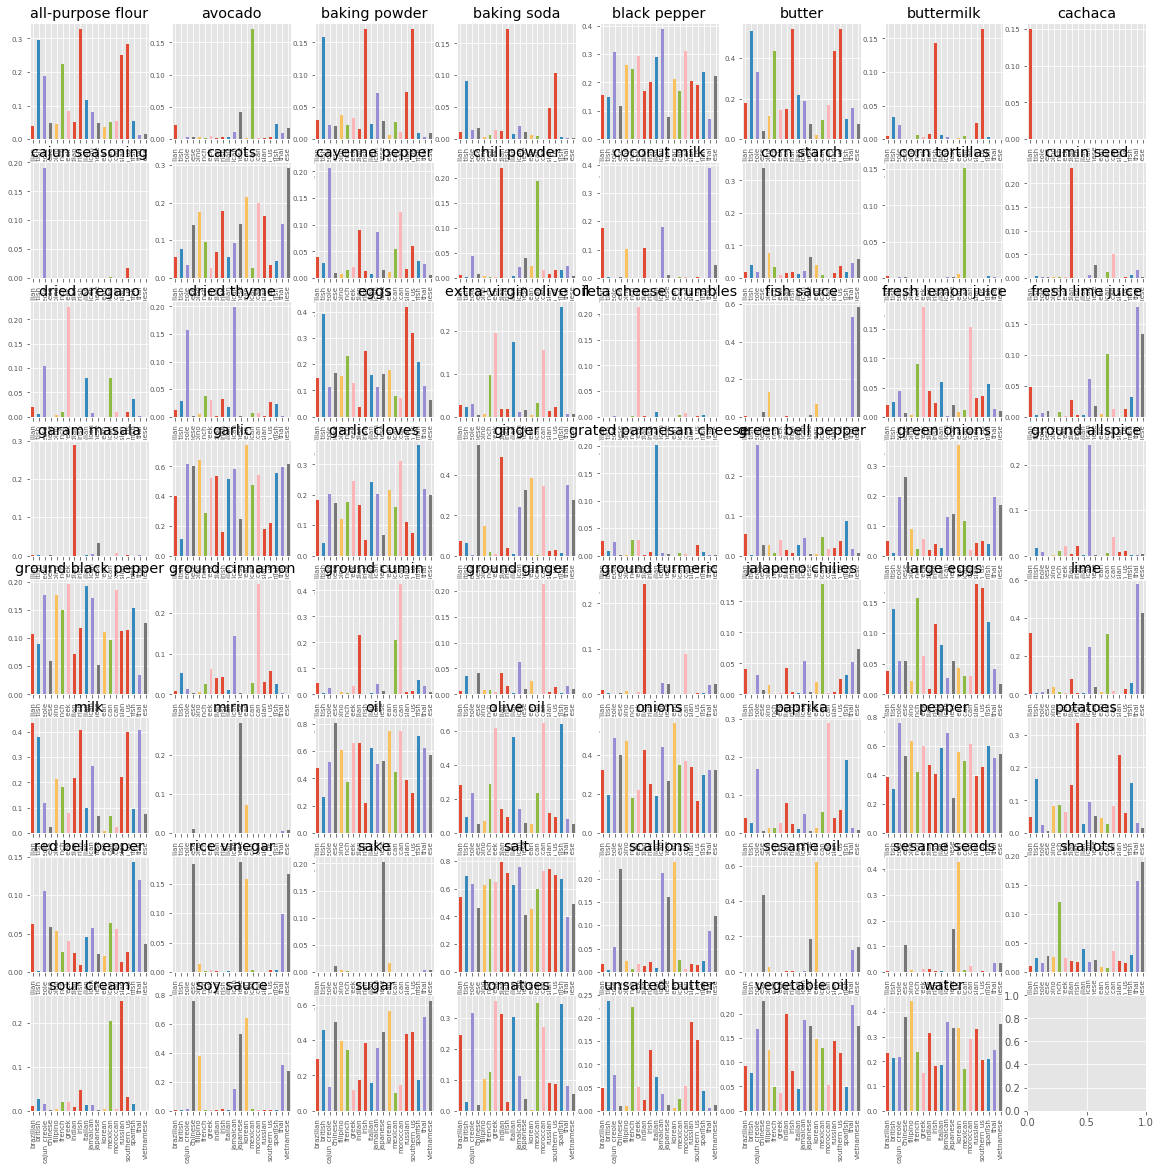

In [137]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = food['all_ingredients'].str.contains(ingredient)
    relative_freq = (food[indices]['cuisine'].value_counts() / food['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [139]:
#training logistic regression
from sklearn.feature_extraction.text import CountVectorizer


In [146]:
cv = CountVectorizer()
X = cv.fit_transform(food['all_ingredients'].values)
X.shape

(39774, 3051)

In [150]:
print(list(cv.vocabulary_.keys())[:100])
#We see that the vectorizer has retained 3010 ingredients and processed 
#the 40 000 recipes in the training dataset. We can easily access the features 
#to check them using the vectorizers properties (which is a dictionary):


['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [154]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(food.cuisine)

In [156]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9],
      dtype=int64)

In [158]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [163]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [166]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
logistic.score(X_test, y_test)

0.7844123192960403

Text(0.5,64.6,'Predicted label')

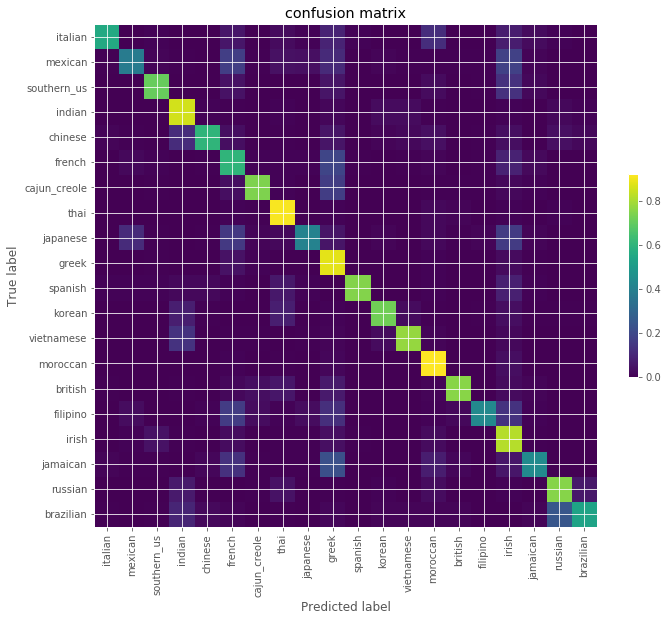

In [171]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = food['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [172]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.83      0.56      0.67       107
     mexican       0.57      0.38      0.46       164
 southern_us       0.80      0.71      0.75       333
      indian       0.78      0.86      0.82       497
     chinese       0.79      0.60      0.68       154
      french       0.57      0.60      0.59       536
cajun_creole       0.80      0.74      0.77       233
        thai       0.86      0.91      0.89       628
    japanese       0.73      0.41      0.53       151
       greek       0.80      0.89      0.84      1545
     spanish       0.83      0.75      0.79       100
      korean       0.87      0.72      0.79       293
  vietnamese       0.78      0.78      0.78       156
    moroccan       0.91      0.92      0.92      1312
     british       0.83      0.76      0.79       148
    filipino       0.75      0.43      0.55       104
       irish       0.69      0.82      0.75       836
    jamaican       0.59    